In [22]:
import pandas as pd
from statsmodels.stats.weightstats import _tconfint_generic
import numpy as np
import matplotlib.pyplot as plt

## Задание 1

In [23]:
path_to_project_directory = '/content/drive/My Drive/Colab Notebooks/SEVERSTAL_task/Data/' # путь к папке с файлами, данными по условию
assert path_to_project_directory, 'Add your path to files in variable "path_to_project_directory"!'

In [24]:
statistics = pd.read_csv(path_to_project_directory+'Статистика за 2018 год.csv', encoding='cp1251')
statistics

,Число бракованных листов,Скорость прокатки,Марка стали
0,3,3.8,A
1,3,3.8,B
2,3,4.8,B
3,4,4.4,B
4,6,5.0,B
...,...,...,...
232,1,4.7,A
233,3,3.4,A
234,2,5.5,A
235,3,5.0,B


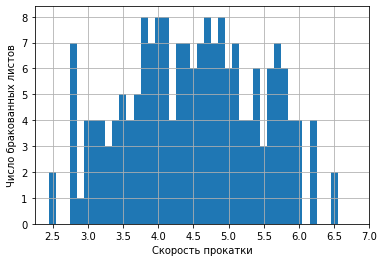

In [25]:
plt.bar(statistics['Скорость прокатки'],
        statistics['Число бракованных листов'],
        width=0.1)
plt.xlabel('Скорость прокатки')
plt.ylabel('Число бракованных листов')
plt.yticks(statistics['Число бракованных листов'].unique())
plt.xticks(np.arange(min(statistics['Скорость прокатки']), 
                     max(statistics['Скорость прокатки'])+1, 
                     0.5))

plt.grid()

In [26]:
# функция считает среднее значение и его 95% и 90% довер. интервал
def mean_confidence_interval(df): 
  interval_95 = _tconfint_generic(df.mean(), df.std(ddof=1)/np.sqrt(len(df)), 
                                  len(df)-1, 0.05, 'two-sided') 
  interval_90 = _tconfint_generic(df.mean(), df.std(ddof=1)/np.sqrt(len(df)), 
                                  len(df)-1, 0.1, 'two-sided')
  return {'interval_95': interval_95, 'interval_90': interval_90, 'mean': df.mean()}

<hr>

### Гипотеза 1
Более 3 бракованных листов на партию выходит значимо чаще для стали марки А, чем для стали марки B.


In [27]:
mark_A = statistics[(statistics['Марка стали']=='A') & (statistics['Число бракованных листов']>3)]['Число бракованных листов']
mark_B = statistics[(statistics['Марка стали']=='B') & (statistics['Число бракованных листов']>3)]['Число бракованных листов']

In [28]:
mean_confidence_interval(mark_A)

{'interval_90': (4.805042256187025, 5.421372838152599),
 'interval_95': (4.743957591263485, 5.482457503076138),
 'mean': 5.113207547169812}

In [29]:
mean_confidence_interval(mark_B)

{'interval_90': (4.606515208023005, 5.166212064704268),
 'interval_95': (4.550644180687348, 5.2220830920399255),
 'mean': 4.886363636363637}

Действительно, более 3 бракованных листов на партию выходит чаще для стали марки А, чем для стали марки B. Хотя статистически значимого различия в полученных оценках параметра нет, вследствие пересечения интервалов.

<hr>

### Гипотеза 2
При скоростях прокатки более 4 м/с свыше 3 бракованных листов стали на партию выходит значимо чаще, чем при меньших скоростях прокатки.


In [30]:
less_4 = statistics[(statistics['Скорость прокатки']<=4) & (statistics['Число бракованных листов']>3)]['Число бракованных листов']
greater_4 = statistics[(statistics['Скорость прокатки']>4) & (statistics['Число бракованных листов']>3)]['Число бракованных листов']

In [31]:
mean_confidence_interval(less_4)

{'interval_90': (4.383112007929223, 5.356018426853386),
 'interval_95': (4.282053634235697, 5.457076800546912),
 'mean': 4.869565217391305}

In [32]:
mean_confidence_interval(greater_4)

{'interval_90': (4.820919701799496, 5.287188406308613),
 'interval_95': (4.775160208256021, 5.332947899852088),
 'mean': 5.054054054054054}

Один интервал находится внутри другого, значит ответ не так однозначен. Нельзя утверждать, что гипотеза верна, по крайней мере на данной выборке и при определенном уровне достоверности.

<hr>

## Задание 2

In [33]:
X_data = pd.read_csv(path_to_project_directory+'X_data.csv', encoding='cp1251', sep=';')
Y_train = pd.read_csv(path_to_project_directory+'Y_train.csv', encoding='cp1251', sep=';', header=None, index_col=0)
Y_submit = pd.read_csv(path_to_project_directory+'Y_submit.csv', encoding='cp1251', sep=';', header=None, index_col=0)

In [34]:
Y_train.head(3)

,1
0,
2015-01-04 00:05:00,392
2015-01-04 01:05:00,384
2015-01-04 02:05:00,393


In [35]:
Y_submit.head(3)

,1
0,
2018-05-04 00:05:00,420
2018-05-04 01:05:00,420
2018-05-04 02:05:00,420


In [36]:
X_data.head(3)

,Unnamed: 0,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
0,2015-01-01 00:00:00,212,210,211,347,353,347,474,473,481,346,348,355,241,241,243,167.85,9.22
1,2015-01-01 00:01:00,212,211,211,346,352,346,475,473,481,349,348,355,241,241,243,162.51,9.22
2,2015-01-01 00:02:00,212,211,211,345,352,346,476,473,481,352,349,355,242,241,242,164.99,9.22


In [37]:
X_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2103841 entries, 0 to 2103840
Data columns (total 18 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  2103841 non-null  object 
 1   T_data_1_1  2103841 non-null  int64  
 2   T_data_1_2  2103841 non-null  int64  
 3   T_data_1_3  2103841 non-null  int64  
 4   T_data_2_1  2103841 non-null  int64  
 5   T_data_2_2  2103841 non-null  int64  
 6   T_data_2_3  2103841 non-null  int64  
 7   T_data_3_1  2103841 non-null  int64  
 8   T_data_3_2  2103841 non-null  int64  
 9   T_data_3_3  2103841 non-null  int64  
 10  T_data_4_1  2103841 non-null  int64  
 11  T_data_4_2  2103841 non-null  int64  
 12  T_data_4_3  2103841 non-null  int64  
 13  T_data_5_1  2103841 non-null  int64  
 14  T_data_5_2  2103841 non-null  int64  
 15  T_data_5_3  2103841 non-null  int64  
 16  H_data      2103841 non-null  float64
 17  AH_data     2103841 non-null  float64
dtypes: float64(2), int64(1

Пропущенных значений нет. Все столбцы содержат 2103841 значений, что равняется длине всего датафрейма<hr>
Так как значения *H_data* и *AH_data* фиксируются на **входе**, то приходим к мнению, что в *1 колонке X_data* записано **время начала проката**. Чтобы сопоставить *данные с детекторов* и *данные о качестве*, которые составляются **на выходе обжиговой машины** к каждому значению X_data['Unnamed: 0'] прибавим время 1 полного прохода обжига, то есть 1 час.

In [38]:
from datetime import datetime, timedelta

print(X_data['Unnamed: 0'].dtype)
X_data['Unnamed: 0'] = pd.to_datetime(X_data['Unnamed: 0']) + timedelta(hours=1)
print(X_data['Unnamed: 0'].dtype)

object
datetime64[ns]


In [39]:
X_data = X_data.set_index(['Unnamed: 0'])
X_data

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
Unnamed: 0,,,,,,,,,,,,,,,,,
2015-01-01 01:00:00,212,210,211,347,353,347,474,473,481,346,348,355,241,241,243,167.85,9.22
2015-01-01 01:01:00,212,211,211,346,352,346,475,473,481,349,348,355,241,241,243,162.51,9.22
2015-01-01 01:02:00,212,211,211,345,352,346,476,473,481,352,349,355,242,241,242,164.99,9.22
2015-01-01 01:03:00,213,211,211,344,351,346,477,473,481,355,349,355,242,241,242,167.34,9.22
2015-01-01 01:04:00,213,211,211,343,350,346,478,473,482,358,349,355,243,241,242,163.04,9.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01 00:56:00,271,261,265,353,359,353,481,449,491,325,328,328,277,276,280,157.20,8.44
2019-01-01 00:57:00,271,261,265,353,359,353,481,449,491,325,328,328,277,276,280,160.40,8.44
2019-01-01 00:58:00,271,261,265,353,359,353,481,449,491,325,328,328,277,276,280,160.14,8.44


Составим датафрейм, состоящий только из данных, метрики качества которых нам известны:

In [42]:
X = X_data.loc[X_data.index.isin(Y_train.index)]
X.shape, Y_train.shape

((29184, 17), (29184, 1))

In [43]:
from sklearn.model_selection import cross_val_score, train_test_split

X_train, X_holdout, y_train, y_holdout = train_test_split(X, Y_train.values, 
                                                          test_size=0.3, random_state=2)

In [44]:
(X_train.shape, y_train.shape), \
(X_holdout.shape, y_holdout.shape)

(((20428, 17), (20428, 1)), ((8756, 17), (8756, 1)))

### Модель на основе случайного леса

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [48]:
forest_params = {
    'max_depth': list(range(22, 26)), 
    'min_samples_leaf': list(range(1, 3)),
    'max_features': list(range(10,14)),
    'n_estimators': list(range(1000,2000, 100)),
    }

locally_best_forest = GridSearchCV(RandomForestRegressor(n_jobs=-1, random_state=2,),
                                   forest_params, 
                                   scoring='neg_mean_absolute_error',  
                                   n_jobs=-1, 
                                   verbose=True)

# locally_best_forest.fit(X_train, y_train)
# locally_best_forest.best_params_, locally_best_forest.best_score_
# mae(y_holdout, locally_best_forest.predict(X_holdout))

In [49]:
model_rf = RandomForestRegressor(max_depth=24, max_features=10, 
                                 min_samples_leaf=1, n_estimators=1900, 
                                 random_state=2)
model_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=24, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1900, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

In [50]:
y_pred_RF = model_rf.predict(X_holdout)

### Модель на основе нейронной сети

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as l
from tensorboard import notebook
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
NN_model = Sequential([
                       l.Dense(200, kernel_initializer='normal', activation='relu', input_shape=(len(X_train.columns),)), 
                       l.BatchNormalization(),
                       l.Dropout(0.2), 
                       l.Dense(100, kernel_initializer='normal', activation='relu',), 
                       l.Dropout(0.2), 
                       l.Dense(50, kernel_initializer='normal', activation='relu',), 
                       l.BatchNormalization(),
                       l.Dropout(0.2), 
                       l.Dense(25, kernel_initializer='normal', activation='relu',), 
                       l.Dropout(0.2), 
                       l.Dense(1, kernel_initializer='normal'),
                       ])
path_to_log = path_to_project_directory+'/logs/'

NN_model.compile(loss='mean_absolute_error', optimizer='adam', 
                 metrics=['mean_absolute_error'],)

logger = [tf.keras.callbacks.TensorBoard(
    log_dir=path_to_log, 
    write_graph=True,
    histogram_freq=5, 
    profile_batch=100000000,
    )]

In [ ]:
NN_history = NN_model.fit(X_train, y_train,
                          validation_data=(X_holdout, y_holdout), 
                          epochs=50, batch_size=10, 
                          callbacks = logger, 
                          use_multiprocessing=True,)

Epoch 1/50
2043/2043 [==============================] - 6s 3ms/step - loss: 127.5531 - mean_absolute_error: 127.5531 - val_loss: 84.2676 - val_mean_absolute_error: 84.2676
Epoch 2/50
2043/2043 [==============================] - 6s 3ms/step - loss: 67.8230 - mean_absolute_error: 67.8230 - val_loss: 29.0465 - val_mean_absolute_error: 29.0465
Epoch 3/50
2043/2043 [==============================] - 6s 3ms/step - loss: 57.0734 - mean_absolute_error: 57.0734 - val_loss: 29.1874 - val_mean_absolute_error: 29.1874
Epoch 4/50
2043/2043 [==============================] - 6s 3ms/step - loss: 51.8936 - mean_absolute_error: 51.8936 - val_loss: 19.7618 - val_mean_absolute_error: 19.7618
Epoch 5/50
2043/2043 [==============================] - 6s 3ms/step - loss: 48.8280 - mean_absolute_error: 48.8280 - val_loss: 44.2154 - val_mean_absolute_error: 44.2154
Epoch 6/50
2043/2043 [==============================] - 6s 3ms/step - loss: 45.6307 - mean_absolute_error: 45.6307 - val_loss: 15.9840 - val_mean_ab

In [ ]:
# %tensorboard --logdir=$path_to_log --host localhost --port=6007

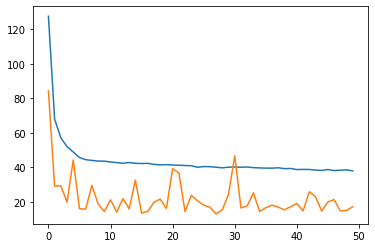

In [ ]:
plt.plot(NN_history.history['mean_absolute_error'])
plt.plot(NN_history.history['val_mean_absolute_error'])

In [ ]:
y_pred_NN = NN_model.predict(X_holdout)

In [ ]:
mae(y_holdout, y_pred_RF), \
mae(y_holdout, y_pred_NN)

(150.2587944974562, 499.7802927156932)

<hr>

Модель случайного леса показала лучший результат на отложенной выборке. Значит в итоге будем использовать ее.

### Итоговое вычисление качества продукции

In [51]:
X_submit = X_data.loc[X_data.index.isin(Y_submit.index)]

In [52]:
Y_pred = pd.DataFrame(model_rf.predict(X_submit), index=Y_submit.index)

In [53]:
Y_pred

,0
0,
2018-05-04 00:05:00,451.952014
2018-05-04 01:05:00,442.242281
2018-05-04 02:05:00,440.351316
2018-05-04 03:05:00,422.918459
2018-05-04 04:05:00,401.660053
...,...
2018-12-31 19:05:00,462.677945
2018-12-31 20:05:00,477.960434
2018-12-31 21:05:00,462.886253


In [56]:
Y_pred.to_csv(path_to_project_directory+'Y_pred.csv', header=None)